In [1]:
# data management
import pandas as pd
import numpy as np

# preprocessing
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# model
import xgboost as xgb

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("./data/clean/bullying_light_clean_2.csv")

In [4]:
# df = df.drop(columns='Unnamed: 0')
df.dropna(axis=0, inplace=True) # drop rows that contain any null values
df = df[~df.duplicated()] # drop duplicates
df.reset_index(inplace=True, drop=True) # reset indexes of dataframe for readability

In [18]:
def remove_mentions(text):
  return re.sub(r'<@>', r'', text)

df['tweet_text'] = df['tweet_text'].apply(remove_mentions)

In [5]:
df.cyberbullying_type.value_counts()

cyberbullying_type
religion               7936
age                    7911
ethnicity              7406
gender                 7310
other_cyberbullying    6529
not_cyberbullying      6267
Name: count, dtype: int64

In [14]:
df['cyberbullying_type'] = df['cyberbullying_type'].replace({
        'religion': 0,
        'age': 1,
        'gender': 2,
        'ethnicity': 3,
        'other_cyberbullying': 4,
        'not_cyberbullying': 5
})

C:\Users\rooty\AppData\Local\Temp\ipykernel_7084\1110111105.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cyberbullying_type'] = df['cyberbullying_type'].replace({


In [20]:
df = df.drop(df[df.cyberbullying_type == 5].index)

In [21]:
# # Separate features and labels
# X = df.tweet_text
# y = df.cyberbullying_type

In [15]:
#Split 1
x_Train_1, x_Test_1, y_Train_1, y_Test_1 = train_test_split(
    df.tweet_text,
    df.cyberbullying_type,
    test_size=.2,
    random_state=100,
    shuffle=True
)

#Split 2
x_Train_2, x_Test_2, y_Train_2, y_Test_2 = train_test_split(
    df.tweet_text,
    df.cyberbullying_type,
    test_size=.3,
    random_state=100,
    shuffle=True
)

#Split 3
x_Train_3, x_Test_3, y_Train_3, y_Test_3 = train_test_split(
    df.tweet_text,
    df.cyberbullying_type,
    test_size=.4,
    random_state=100,
    shuffle=True
)

In [7]:
print(df.tweet_text.isnull().sum())

0


# VECTORIZATION

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vect1 = CountVectorizer()
vect1.fit(x_Train_1)
x_train_BOW_1 = vect1.transform(x_Train_1)
x_test_BOW_1 = vect1.transform(x_Test_1)
# vocab1 = vect1.vocabulary_

vect2 = CountVectorizer()
vect2.fit(x_Train_2)
x_train_BOW_2 = vect2.transform(x_Train_2)
x_test_BOW_2 = vect2.transform(x_Test_2)

vect3 = CountVectorizer()
vect3.fit(x_Train_3)
x_train_BOW_3 = vect3.transform(x_Train_3)
x_test_BOW_3 = vect3.transform(x_Test_3)

In [11]:
vect1.get_feature_names_out()

array(['00', '000', '000s', ..., '𝕨𝕠𝕦𝕝𝕕', '𝕫𝕠𝕖𝕪', '𝚎𝚕𝚞𝚜𝚒𝚟𝚎'], dtype=object)

In [24]:
hyps = {'booster': 'gbtree', 'n_estimators': 700, 'learning_rate': np.float64(0.62011), 'max_depth': np.int64(48), 'min_child_weight': np.int64(30), 'subsample': np.float64(0.934
), 'colsample_bytree': np.float64(0.176), 'colsample_bylevel': np.float64(0.156), 'colsample_bynode': np.float64(0.003), 'alpha': np.float64(11.518), 'lambda': np.float64(0.764), 'gamma': np.float64(4.921)}

model1 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(df.cyberbullying_type)), **hyps)
model2 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(df.cyberbullying_type)), **hyps)
model3 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(df.cyberbullying_type)), **hyps)

In [25]:
# Train the model
model1.fit(x_train_BOW_1, y_Train_1)
model2.fit(x_train_BOW_2, y_Train_2)
model3.fit(x_train_BOW_3, y_Train_3)

XGBClassifier(alpha=11.518, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.156, colsample_bynode=0.003,
              colsample_bytree=0.176, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4.921, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.764, learning_rate=0.62011,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=48, max_leaves=None,
              min_child_weight=30, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None, ...)

In [26]:
y_pred_1 = model1.predict(x_test_BOW_1)
y_pred_2 = model2.predict(x_test_BOW_2)
y_pred_3 = model3.predict(x_test_BOW_3)

In [19]:
Model_1_Results = 'Model 1 Accuracy : {0:0.4f}\n'. format(accuracy_score(y_Test_1, y_pred_1)) + '\nModel 1 Classification Report:\n' + classification_report(y_Test_1, y_pred_1) + '\n\n'

Model_2_Results = 'Model 2 Accuracy : {0:0.4f}\n'. format(accuracy_score(y_Test_2, y_pred_2)) + '\nModel 2 Classification Report:\n' + classification_report(y_Test_2, y_pred_2) + '\n\n'

Model_3_Results = 'Model 3 Accuracy : {0:0.4f}\n'. format(accuracy_score(y_Test_3, y_pred_3)) + '\nModel 3 Classification Report:\n' + classification_report(y_Test_3, y_pred_3) + '\n\n'

In [23]:
print(Model_2_Results)

Model 2 Accuracy : 0.8498

Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2438
           1       0.99      0.98      0.98      2347
           2       0.93      0.84      0.88      2233
           3       0.99      0.99      0.99      2222
           4       0.57      0.81      0.67      1944
           5       0.61      0.45      0.52      1824

    accuracy                           0.85     13008
   macro avg       0.84      0.83      0.83     13008
weighted avg       0.86      0.85      0.85     13008





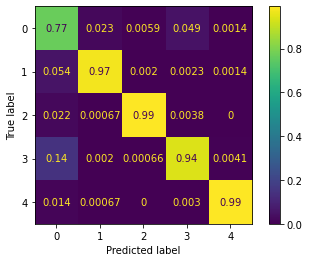

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf1 = confusion_matrix(y_Test_1, y_pred_1, normalize='pred')
ConfusionMatrixDisplay(conf1).plot()

In [31]:
# filename = "xgboost_results_2.txt"

# with open(filename, 'w') as f:
#   f.write('Model 1 Params:\n' + str(model1.get_params())+ '\n\n')
#   f.write(Model_1_Results + '\n\n')
#   f.write('Model 2 Params:\n' + str(model2.get_params())+ '\n\n')
#   f.write(Model_2_Results + '\n\n')
#   f.write('Model 3 Params:\n' + str(model3.get_params())+ '\n\n')
#   f.write(Model_3_Results + '\n\n')
#   f.close()

In [34]:
model1.save_model('xgb_wo_class5.json')